<a href="https://colab.research.google.com/github/Krankile/logo/blob/main/krankile_logo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

##Kernel setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%%capture
!git clone https://github.com/Krankile/npmf.git

In [3]:
%%capture
!cd npmf && git pull

##General setup

In [4]:
import os
from collections import defaultdict
from datetime import datetime

import numpy as np
from numpy.ma.core import outerproduct
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

from npmf.utils.colors import main, main2, main3

In [5]:
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=[main, main2, main3,"black"])

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [7]:
np.random.seed(420)

#Creating our logo!  




In [128]:
points_per_vector = 100

vertical_line_y = np.linspace(0,1,points_per_vector)
vertical_line_x = np.zeros(points_per_vector)

upwards_k_y = np.linspace(0.5,1,int(points_per_vector/2))
upwards_k_x = np.linspace(0,0.08,int(points_per_vector/2))

downwards_k_y = np.linspace(0.5,0,int(points_per_vector/2))
downwards_k_x = np.linspace(0,0.08,int(points_per_vector/2))


space_between_k_and_a = 0.05

upwards_a_y = np.linspace(0,1, points_per_vector)
upwards_a_x = np.linspace(space_between_k_and_a, space_between_k_and_a + 0.05, points_per_vector)


downwards_a_y = np.linspace(1, 0, points_per_vector)
downwards_a_x = np.linspace(space_between_k_and_a + 0.05, space_between_k_and_a + 0.1, points_per_vector)

middle_a_y = np.linspace(upwards_a_y[int(points_per_vector/2)], upwards_a_y[int(points_per_vector/2)], int(points_per_vector/4))
middle_a_x = np.linspace(upwards_a_x[int(points_per_vector/2)], downwards_a_x[int(points_per_vector/2)], int(points_per_vector/4))


K = [(vertical_line_x, vertical_line_y), (upwards_k_x, upwards_k_y), (downwards_k_x, downwards_k_y)]
A = [(upwards_a_x, upwards_a_y), (downwards_a_x, downwards_a_y), (middle_a_x, middle_a_y)]

characters = dict(K=K, A=A)
color = dict(K=main, A=main2)

Lets search for the right logo

0.0


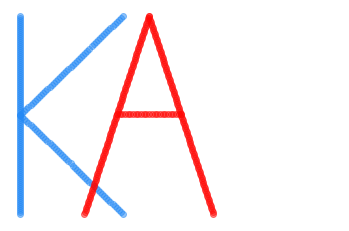

0.0010526315789473684


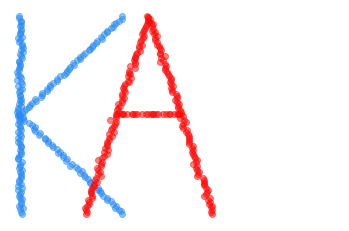

0.002105263157894737


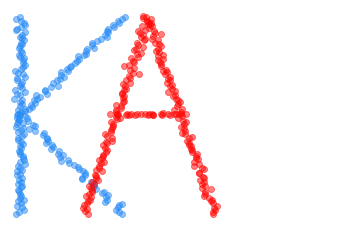

0.003157894736842105


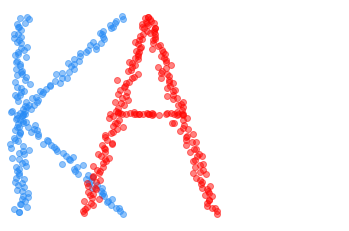

0.004210526315789474


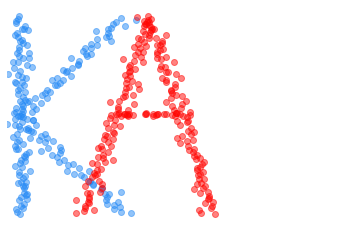

0.005263157894736842


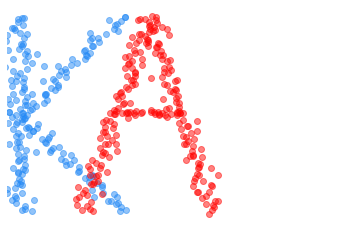

0.00631578947368421


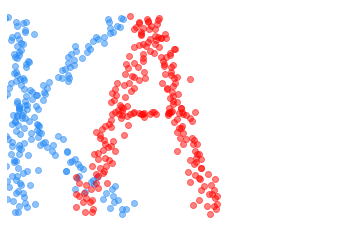

0.007368421052631579


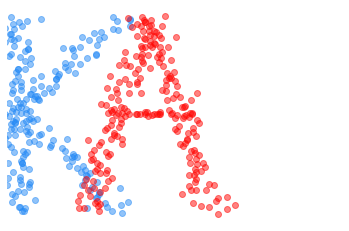

0.008421052631578947


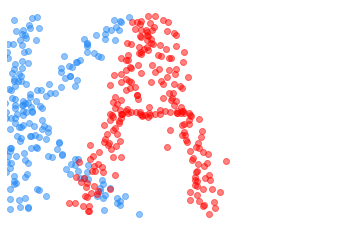

0.009473684210526315


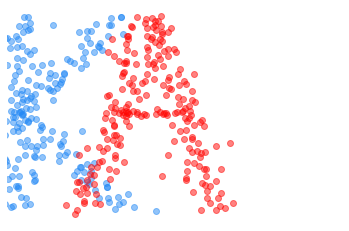

0.010526315789473684


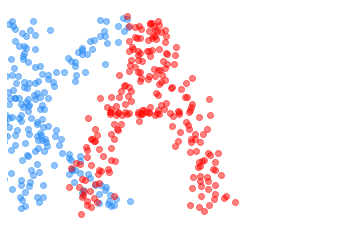

0.011578947368421053


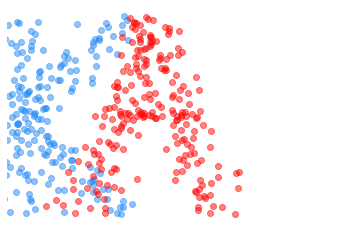

0.01263157894736842


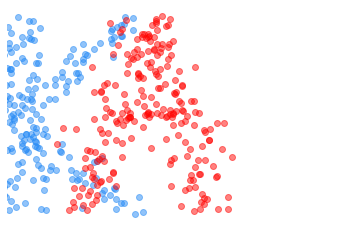

0.013684210526315788


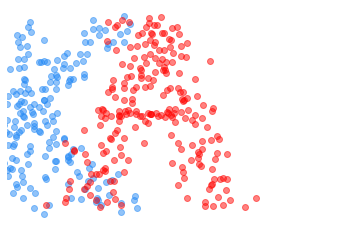

0.014736842105263158


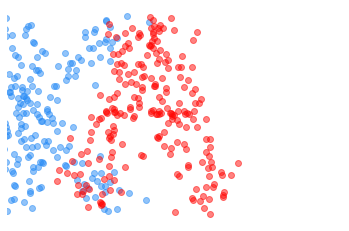

0.015789473684210527


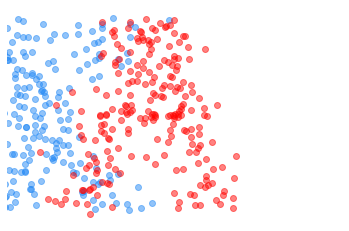

0.016842105263157894


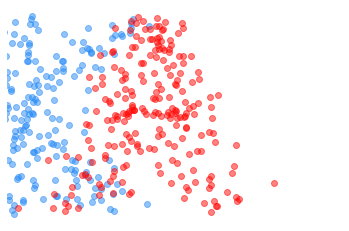

0.017894736842105262


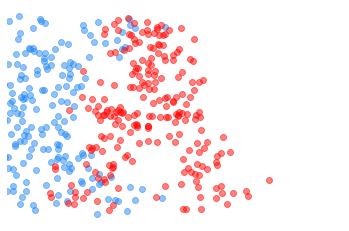

0.01894736842105263


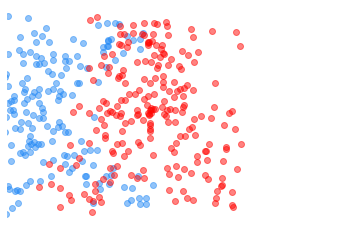

0.02


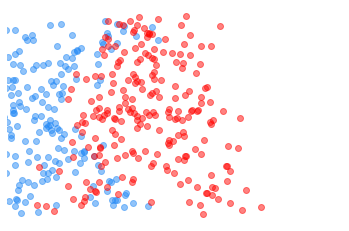

In [129]:

sigma = 0.0025

for sigma in np.linspace(0,0.02,20):
    print(sigma)
    plt.xlim(-0.01, 0.25)
    plt.box(False)
    plt.xticks([])
    plt.yticks([])
    for character in characters: 
        
        for sub_letter_tuple in characters[character]:
            noise_x = np.random.normal(0,sigma, sub_letter_tuple[0].shape[0])
            noise_y = np.random.normal(0,sigma, sub_letter_tuple[1].shape[0])
            x = sub_letter_tuple[0]+noise_x
            y = sub_letter_tuple[1]+noise_y
            
            plt.scatter(x, y, color=color[character], alpha=0.5)
    plt.show()
            

We now plot the final logo

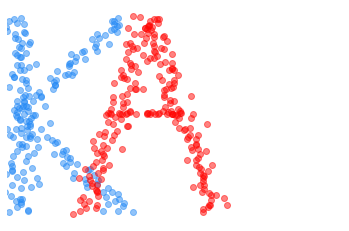

In [137]:
best_sigma = 0.00631578947368421

plt.xlim(-0.01, 0.25)
plt.box(False)
plt.xticks([])
plt.yticks([])

for character in characters: 
        
        for sub_letter_tuple in characters[character]:
            noise_x = np.random.normal(0,best_sigma, sub_letter_tuple[0].shape[0])
            noise_y = np.random.normal(0,best_sigma, sub_letter_tuple[1].shape[0])
            x = sub_letter_tuple[0]+noise_x
            y = sub_letter_tuple[1]+noise_y
            
            plt.scatter(x, y, color=color[character], alpha=0.5)
plt.show();